In [1]:
from analysis.get_dataframe_from_results import get_pandas_dataset
from analysis.dataset_graphs import plot_graphs_of_dataset_loc
from analysis.get_tables_results import create_table_cleaned
from analysis.get_results import bar_chart_cleaned,bar_chart_fix_position_cleaned
from analysis.get_results import sucess_vs_position_cleaned, get_latex_table_with_verif_stats

import utils.global_variables as gl
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [2]:
RESULT_DIR = gl.BASE_PATH / "results/dafny_llm_results_rq4"
DATASET_DIR = gl.DAFNY_ASSERTION_DATASET

print(DATASET_DIR)
print(RESULT_DIR)
verif_data_pd = get_pandas_dataset(DATASET_DIR, RESULT_DIR)
verif_data_pd  = verif_data_pd.assign(success=lambda d: d['verif_sucess'] > 0) 

/home/ricostynha/Desktop/dafny_assertion_inference/dataset/dafny_assertion_dataset
/home/ricostynha/Desktop/dafny_assertion_inference/results/dafny_llm_results_rq4


<>:15: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
<>:15: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
/tmp/ipykernel_36550/243974864.py:15: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
  info = get_latex_table_with_verif_stats(verif_data_pd, "Verification success rate for each approach for each category of benchmarks for the position retrieval strategy without examples (\enoex).", "tbl:assertion-inference-verification-position", test_models)



\begin{table}[!t]
\begin{center}
\small
\caption{Verification success rate for each approach for each category of benchmarks for the position retrieval strategy without examples (\enoex).}
\label{tbl:assertion-inference-verification-position}
\begin{tabular}{|l|c|c|c|c|}
\hline
\multirow{2}{*}{Approach} & \multicolumn{4}{c|}{Benchmarks} \\
\cline{2-5}
 & w/o-1 (236) & w/o-2 (184) & All (28) & Combined (448) \\
\hline
HAIKU LLMEX$_{fl}$ & 126 (53.0\%) & \phantom{0}18 (\phantom{0}9.0\%) & \phantom{00}5 (17.0\%) & 149 (33.3\%) \\
OPUS Laurel$_{fl+}$ & 178 (75.0\%) & \phantom{0}11 (\phantom{0}5.0\%) & \phantom{00}6 (21.0\%) & 195 (43.5\%) \\
OPUS LLMEX$_{fl}$ & 184 (77.0\%) & \phantom{0}61 (33.0\%) & \phantom{00}8 (28.0\%) & 253 (56.5\%) \\
OPUS Hybrid$_{fl}$ & 203 (86.0\%) & \phantom{0}66 (35.0\%) & \phantom{00}6 (21.0\%) & 275 (61.4\%) \\
\hline
\end{tabular}
\end{center}
\end{table}



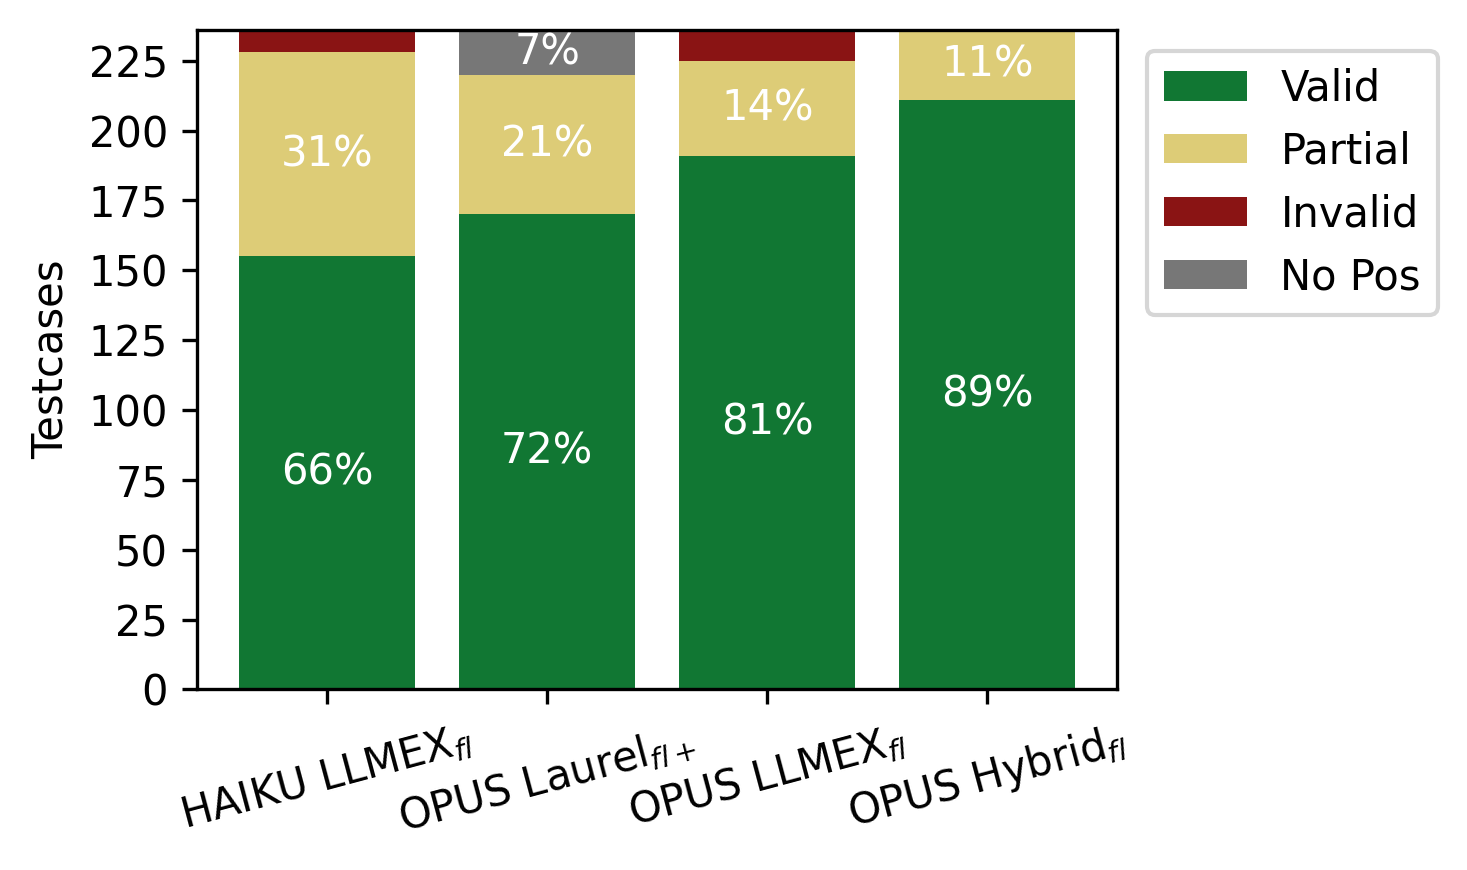

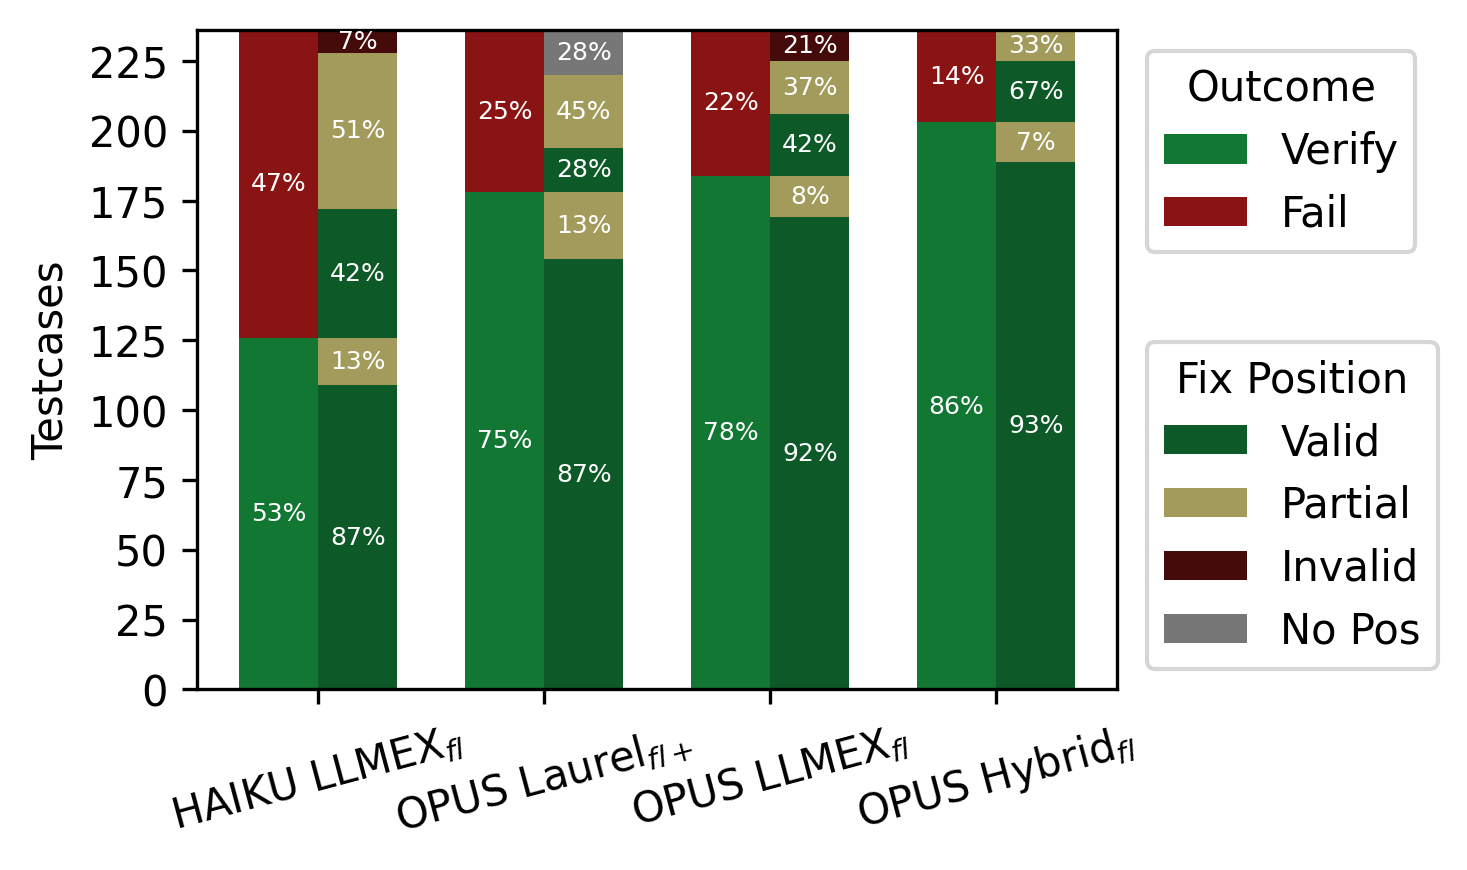

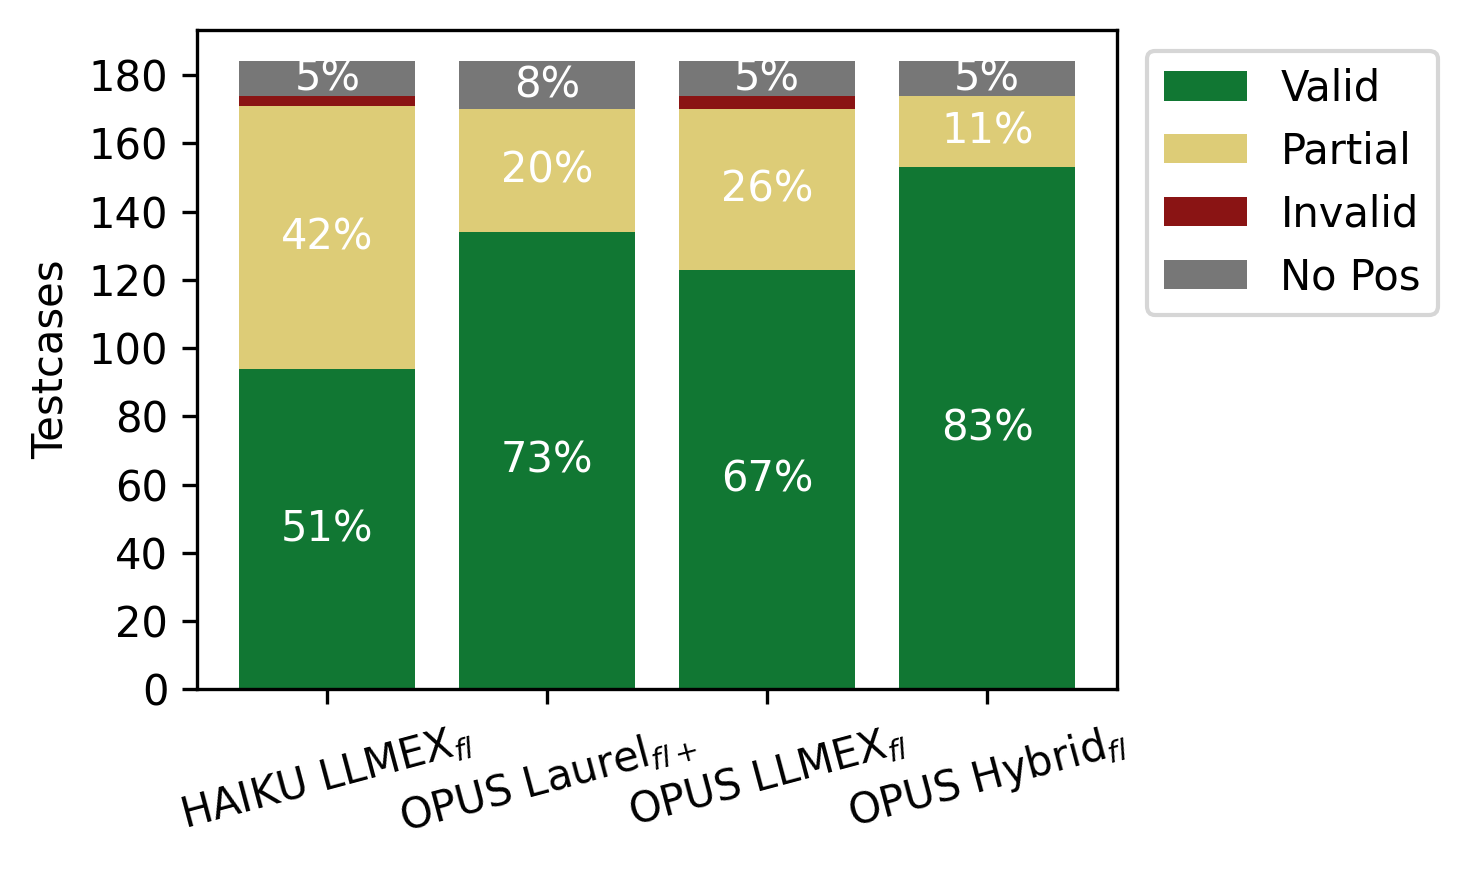

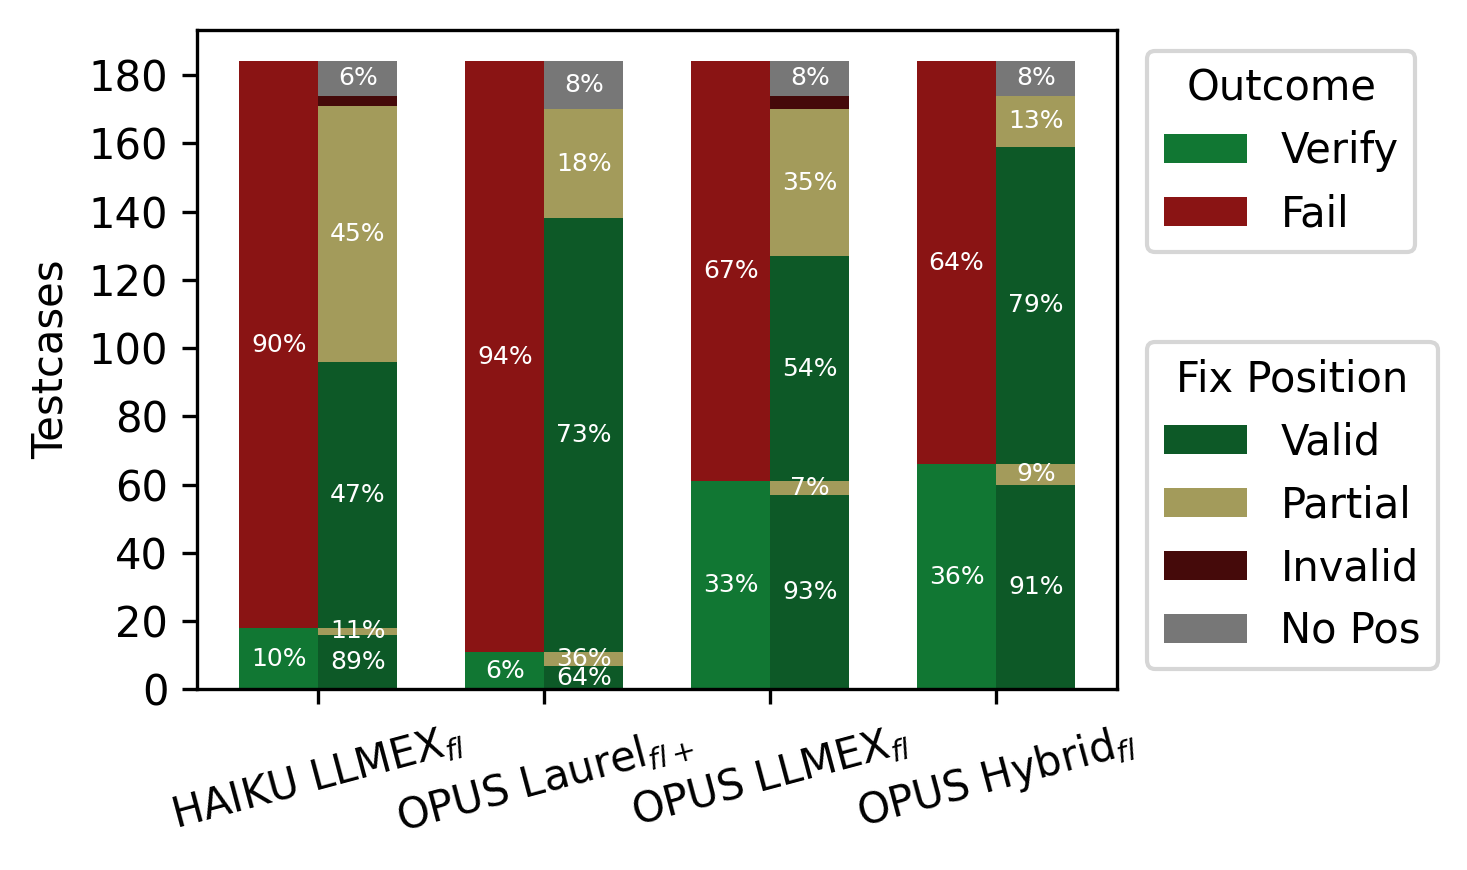

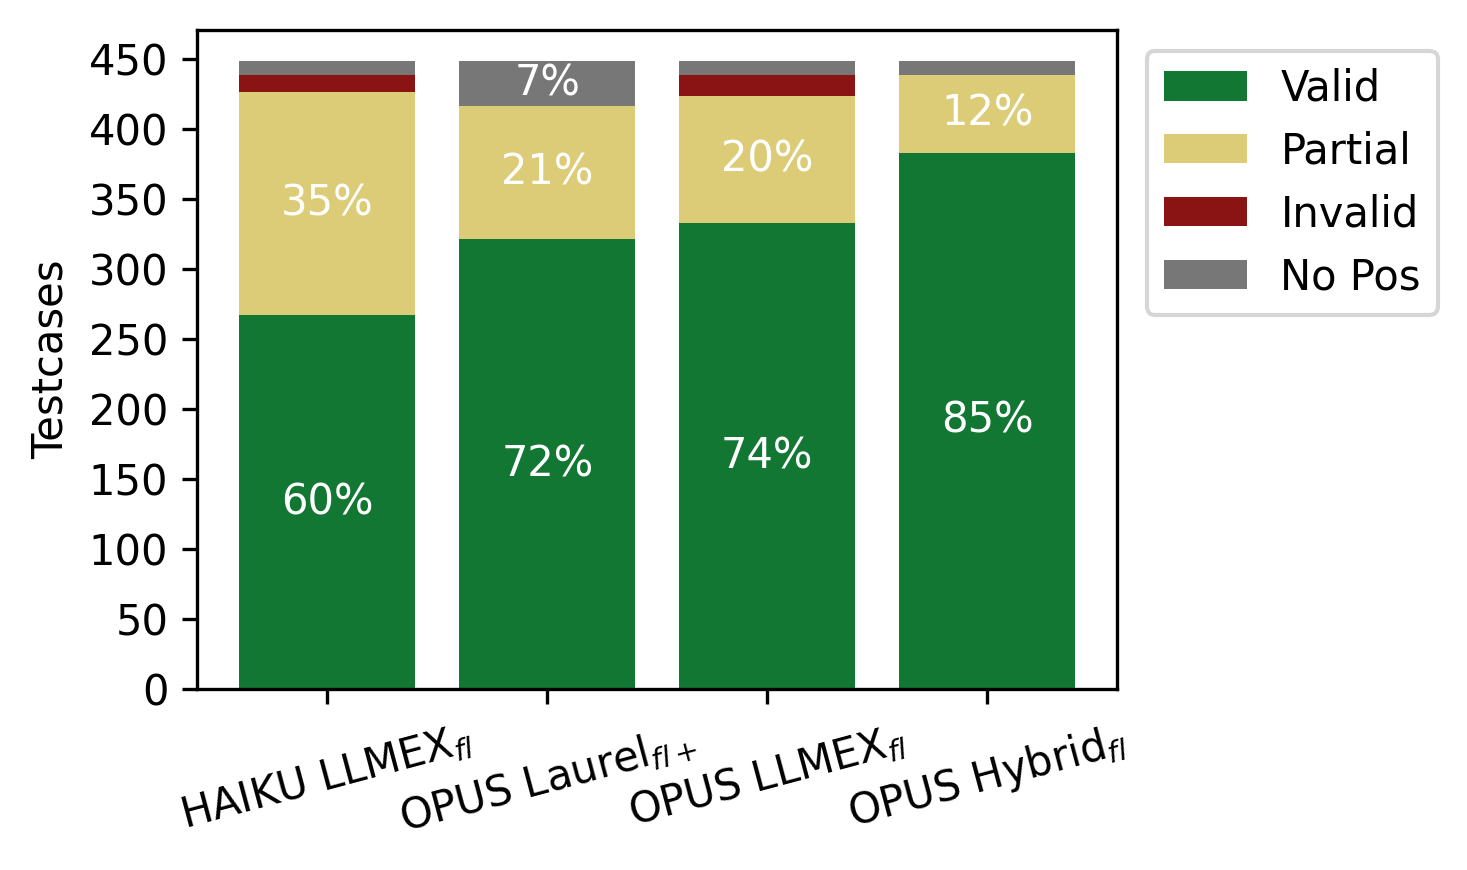

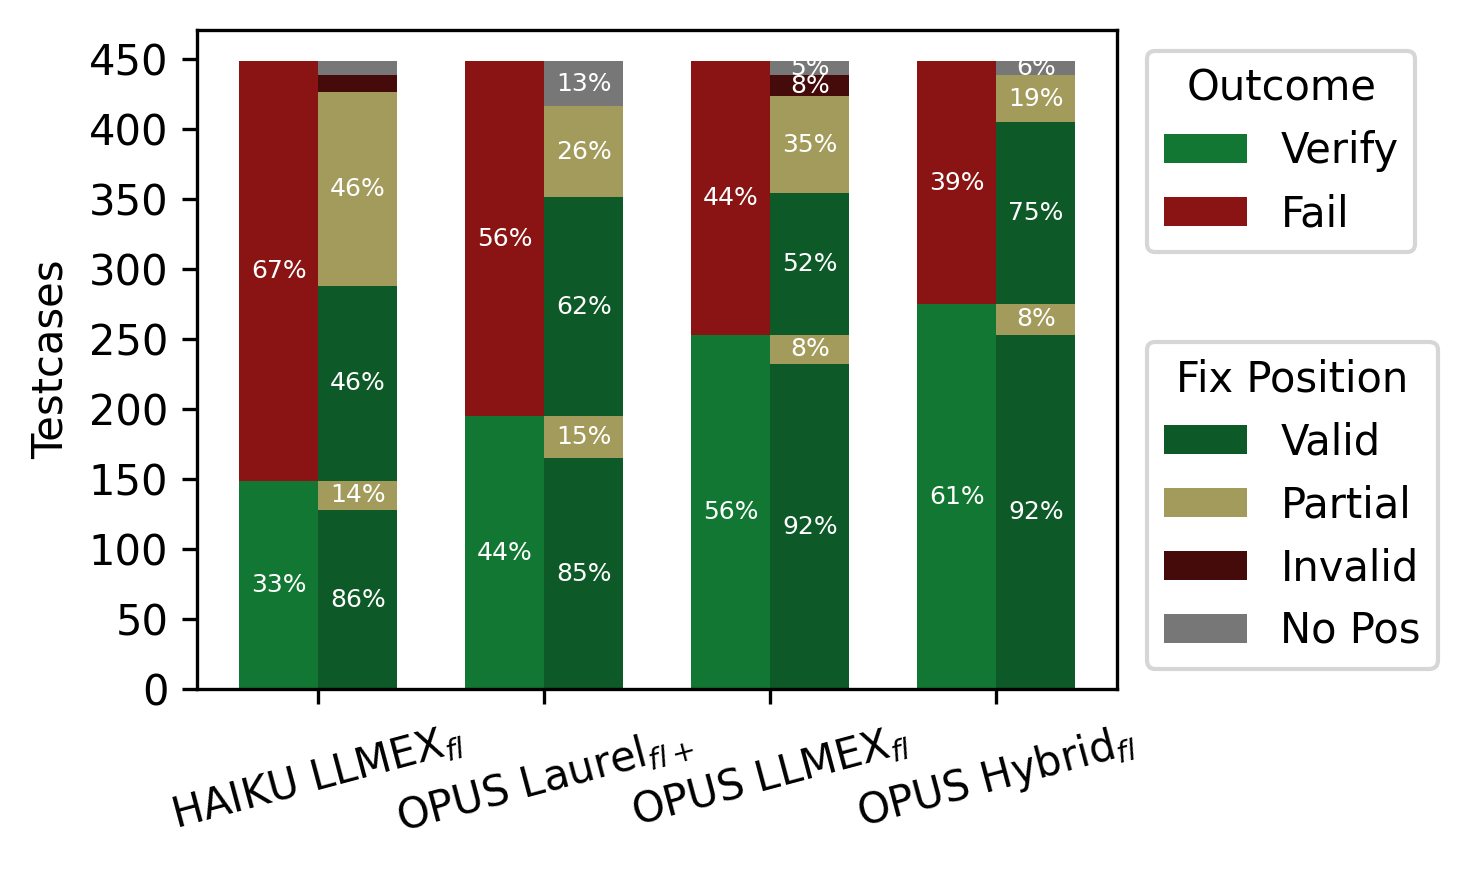

In [3]:
# Graphs of position evaluation
test_models ={ 
   "claude-haiku-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.LLM_EXAMPLE" : "HAIKU LLMEX$_{fl}$",
   "claude-opus-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.LAUREL_BETTER" : "OPUS Laurel$_{fl+}$",
   "claude-opus-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.LLM_EXAMPLE" : "OPUS LLMEX$_{fl}$",
   "claude-opus-4.5__nAssertions_ALL_nRounds_1_nRetries_1_addError_True_addExamp_3_alpha_0.25_ExType_ExampleStrategies.DYNAMIC_loc_LocStrategies.HYBRID" : "OPUS Hybrid$_{fl}$",
}

w1d = verif_data_pd[verif_data_pd["benchmark"] == "w/o-1"]
w2d =  verif_data_pd[verif_data_pd["benchmark"] == "w/o-2"]
#verif_data_pd = verif_data_pd[verif_data_pd["benchmark"] != "w/o-1"]

images_p = gl.BASE_PATH / "images"

info = get_latex_table_with_verif_stats(verif_data_pd, "Verification success rate for each approach for each category of benchmarks for the position retrieval strategy without examples (\enoex).", "tbl:assertion-inference-verification-position", test_models)
print(info)

bar_chart_fix_position_cleaned(w1d ,"DOUBLE",   test_models, images_p / "rq4__bar_chart_pos_w1d.pdf")
sucess_vs_position_cleaned(w1d ,"DOUBLE",   test_models, images_p / "rq4__sucess_vs_bar_chart_w1d.pdf")


bar_chart_fix_position_cleaned(w2d ,"DOUBLE",   test_models, images_p / "rq4__bar_chart_pos_w2d_rq4.pdf")
sucess_vs_position_cleaned(w2d ,"DOUBLE",   test_models, images_p / "rq4__sucess_vs_bar_chart_w2d_rq4.pdf")

bar_chart_fix_position_cleaned(verif_data_pd ,"DOUBLE",   test_models, images_p / "rq4__bar_chart_pos_combined_rq4.pdf")
sucess_vs_position_cleaned(verif_data_pd ,"DOUBLE",   test_models, images_p / "rq4__sucess_vs_bar_chart_combined_rq4.pdf")
